In [19]:
import pandas as pd
import json
import os
from ProcessRes import *
import numpy as np

In [20]:
res_list = ["batch_9BbqgqGLu0IpZxkDQyqkdSUR_output.jsonl", "batch_M2gUSQlYIpUnk6dOG2aAjvi1_output.jsonl", "batch_mSJV1Vb4CaDskNlNNUtQTnXm_output.jsonl"]
res_df = agg(res_list)
labeled_df = pd.read_excel("all_samples.xlsx").head(1500)
res_df = match_res_df(res_df)
labeled_df["custom_id"] = labeled_df.apply(lambda x: str(x["id"]) +"_" + x["room_type"], axis=1)

In [4]:
res_df = res_df.fillna(np.nan)

In [5]:
res_df = align(res_df, labeled_df)

In [6]:
res_df = res_df.fillna('unknown')
# res_df["ceil_true"] = (res_df["天花板"] == res_df["pred_ceiling"])
# res_df["wall_true"] = (res_df["墙壁"] == res_df["pred_wall"])
# res_df["floor_true"] = (res_df["地板"] == res_df["pred_floor"])
# print(res_df['ceil_true'].mean(),res_df['wall_true'].mean(),res_df['floor_true'].mean())
# print(res_df.head())

In [7]:
a = res_df[['custom_id', '天花板', 'pred_ceiling', '地板', 'pred_floor', '墙壁', 'pred_wall']]

In [8]:
a.loc[a['天花板']=='T2/T4','天花板'] = 'T2'
a.loc[a['pred_ceiling']=='T2/T4','pred_ceiling'] = 'T2'
a.loc[a['墙壁']=='N1/N5', '墙壁'] = 'N1'
a.loc[a['地板']=='D5', '地板'] = 'D4'

In [9]:
from sklearn.metrics import confusion_matrix
m_ceil = confusion_matrix(a['天花板'], a['pred_ceiling'], labels=['T1', 'T2', 'T3', 'T4', 'unknown'])
m_wall = confusion_matrix(a['墙壁'], a['pred_wall'],labels=['N1', 'N2', 'N3', 'N4', 'N5', 'unknown', 'N1/N2','N2/N4','N1/N4'])
m_floor = confusion_matrix(a['地板'], a['pred_floor'], labels=['D1', 'D2', 'D3', 'D4', 'unknown'])

In [10]:
from sklearn.metrics import ConfusionMatrixDisplay

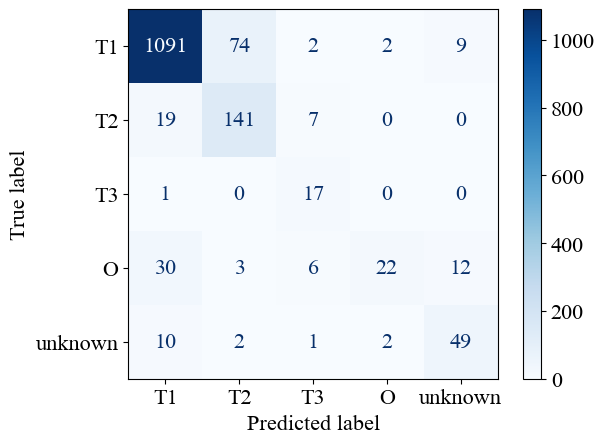

In [11]:
# import seaborn as sns
# sns.set(style='whitegrid')
import matplotlib as mpl
colormap=mpl.cm.get_cmap('Blues') 
from matplotlib import pyplot as plt
plt.rc('font', family='Times New Roman', size=16)
disp = ConfusionMatrixDisplay(m_ceil, display_labels=['T1', 'T2', 'T3', 'O','unknown'])
disp.plot(cmap=colormap)
plt.savefig('Figure8_1.png', bbox_inches='tight')
plt.show()

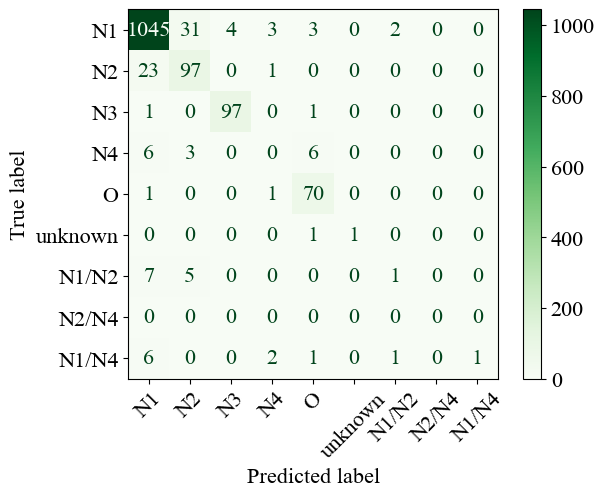

In [12]:
colormap=mpl.cm.get_cmap('Greens') 
disp = ConfusionMatrixDisplay(m_wall, display_labels=['N1', 'N2', 'N3', 'N4', 'O', 'unknown', 'N1/N2','N2/N4','N1/N4'])
disp.plot(cmap=colormap)
plt.xticks(rotation=45)
plt.savefig('Figure8_2.png', bbox_inches='tight')
plt.show()

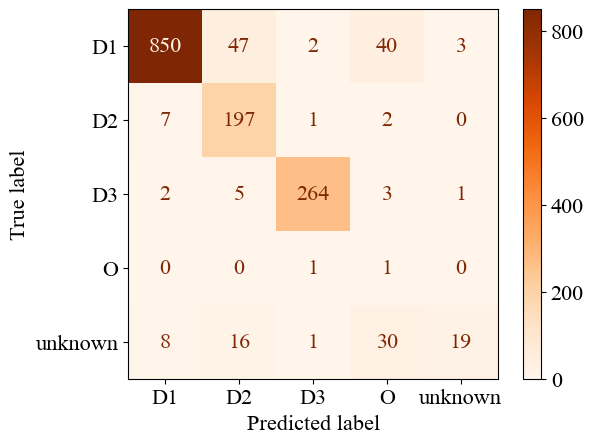

In [13]:
colormap=mpl.cm.get_cmap('Oranges') 
disp = ConfusionMatrixDisplay(m_floor, display_labels=['D1', 'D2', 'D3', 'O', 'unknown'])
disp.plot(cmap=colormap)
plt.savefig('Figure8_3.png', bbox_inches='tight')
plt.show()

In [14]:
retain_col = ['id_x', 'room_type_x', 'img_src', '天花板','pred_ceiling', '墙壁', 'pred_wall', '地板', 'pred_floor', '房间面积', '图像识别过程中灰度化、去噪等处理图片路径', '楼板建造重量',
       '楼板装修废弃物重量', '天花板装修废弃物（如果是石膏板，20%石膏，80%涂料）', '户型图比例（整个房屋）',
       '厚墙墙体线长度（整个房屋）', '薄墙墙体线长度（整个房屋）', '墙体建筑废弃物重量（整个房屋）', '房间墙体线长度(材料A/材料B)',
       '房间墙体装修废弃物重量', '废弃物总量']
res_df[retain_col].to_excel('res_test.xlsx')

In [15]:
from sklearn.metrics import precision_score, recall_score, f1_score

In [16]:
print('------Weighted------')
print('Weighted precision', precision_score(a['天花板'], a['pred_ceiling'], average='weighted'))
print('Weighted recall', recall_score(a['天花板'], a['pred_ceiling'], average='weighted'))
print('Weighted f1-score', f1_score(a['天花板'], a['pred_ceiling'], average='weighted'))
print('------Macro------')
print('Macro precision', precision_score(a['天花板'], a['pred_ceiling'], average='macro'))
print('Macro recall', recall_score(a['天花板'], a['pred_ceiling'], average='macro'))
print('Macro f1-score', f1_score(a['天花板'], a['pred_ceiling'], average='macro'))
print('------Micro------')
print('Micro precision', precision_score(a['天花板'], a['pred_ceiling'], average='micro'))
print('Micro recall', recall_score(a['天花板'], a['pred_ceiling'], average='micro'))
print('Micro f1-score', f1_score(a['天花板'], a['pred_ceiling'], average='micro'))

------Weighted------
Weighted precision 0.8929775363067283
Weighted recall 0.88
Weighted f1-score 0.8777255030903355
------Macro------
Macro precision 0.7300171736748627
Macro recall 0.7563793389780818
Macro f1-score 0.7016038695091681
------Micro------
Micro precision 0.88
Micro recall 0.88
Micro f1-score 0.88


In [17]:
print('------Weighted------')
print('Weighted precision', precision_score(a['墙壁'], a['pred_wall'], average='weighted'))
print('Weighted recall', recall_score(a['墙壁'], a['pred_wall'], average='weighted'))
print('Weighted f1-score', f1_score(a['墙壁'], a['pred_wall'], average='weighted'))
print('------Macro------')
print('Macro precision', precision_score(a['墙壁'], a['pred_wall'], average='macro'))
print('Macro recall', recall_score(a['墙壁'], a['pred_wall'], average='macro'))
print('Macro f1-score', f1_score(a['墙壁'], a['pred_wall'], average='macro'))
print('------Micro------')
print('Micro precision', precision_score(a['墙壁'], a['pred_wall'], average='micro'))
print('Micro recall', recall_score(a['墙壁'], a['pred_wall'], average='micro'))
print('Micro f1-score', f1_score(a['墙壁'], a['pred_wall'], average='micro'))

------Weighted------
Weighted precision 0.8995515215199185
Weighted recall 0.8746666666666667
Weighted f1-score 0.8792333252167239
------Macro------
Macro precision 0.5215350754457212
Macro recall 0.3807571958774638
Macro f1-score 0.39648801323232946
------Micro------
Micro precision 0.8746666666666667
Micro recall 0.8746666666666667
Micro f1-score 0.8746666666666667


In [18]:
print('------Weighted------')
print('Weighted precision', precision_score(a['地板'], a['pred_floor'], average='weighted'))
print('Weighted recall', recall_score(a['地板'], a['pred_floor'], average='weighted'))
print('Weighted f1-score', f1_score(a['地板'], a['pred_floor'], average='weighted'))
print('------Macro------')
print('Macro precision', precision_score(a['地板'], a['pred_floor'], average='macro'))
print('Macro recall', recall_score(a['地板'], a['pred_floor'], average='macro'))
print('Macro f1-score', f1_score(a['地板'], a['pred_floor'], average='macro'))
print('------Micro------')
print('Micro precision', precision_score(a['地板'], a['pred_floor'], average='micro'))
print('Micro recall', recall_score(a['地板'], a['pred_floor'], average='micro'))
print('Micro f1-score', f1_score(a['地板'], a['pred_floor'], average='micro'))

------Weighted------
Weighted precision 0.9389717713607627
Weighted recall 0.8873333333333333
Weighted f1-score 0.902657049803408
------Macro------
Macro precision 0.708889174788325
Macro recall 0.7141566068976759
Macro f1-score 0.6324946633663429
------Micro------
Micro precision 0.8873333333333333
Micro recall 0.8873333333333333
Micro f1-score 0.8873333333333333
